In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [7]:
fair_probs = torch.ones([6])/6    #s概率矩阵
multinomial.Multinomial(1,fair_probs).sample()    #多项分布，（抽一次样，概率矩阵），抽样

tensor([0., 0., 0., 0., 1., 0.])

In [8]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([2., 2., 4., 1., 0., 1.])

In [10]:
# 将结果存储为32位浮点数以进行除法
counts=multinomial.Multinomial(1000,fair_probs).sample()
counts/1000  # 相对频率作为估计值

tensor([0.1570, 0.1620, 0.1790, 0.1830, 0.1420, 0.1770])

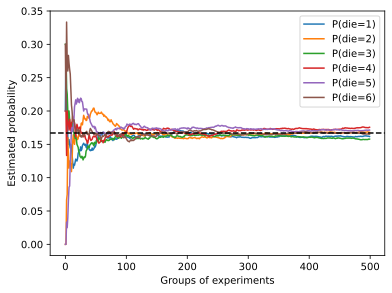

In [21]:
counts = multinomial.Multinomial(10,fair_probs).sample((500,))  #500组样本，每组10次
cum_counts=counts.cumsum(dim=0)   #对每组样本进行累加求和
estimates=cum_counts/cum_counts.sum(dim=1,keepdims=True)
d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                label=("P(die="+str(i+1)+")"))
d2l.plt.axhline(y=0.167,color="black",linestyle="dashed")
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()